In [1]:
import os
import torch
from torch import nn
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from torch.utils.data.sampler import SubsetRandomSampler

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

batch_size = 4
trainSet = datasets.FashionMNIST('~/.pytorch/F_MNIST_data',download=True, train=True, transform=transform)
trainLoader = torch.utils.data.DataLoader(trainSet, batch_size=batch_size, shuffle=True, num_workers=2)

testSet = datasets.FashionMNIST('~/.pytorch/F_MNIST_data',download=True, train=False, transform=transform)
testLoader = torch.utils.data.DataLoader(testSet, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



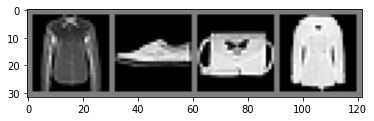

Shirt Sneaker Bag   Coat 


In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainLoader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #filter = 12, kernal = 3*3
        self.conv1 = nn.Conv2d(1, 12, 3, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        #filter = 12, kernal = 6*6
        self.conv2 = nn.Conv2d(12, 12, 6, stride = 2, padding=2)
        #filter = 32, kernal = 6*6
        self.conv3 = nn.Conv2d(12, 32, 6, stride = 2, padding=2)
        
        self.droput = nn.Dropout(0.2)

        self.fc1 = nn.Linear(32, 120)
        self.fc2 = nn.Linear(120, 60)
        self.fc3 = nn.Linear(60, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.droput(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.droput(x)
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        return x


net = Net()

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
#Train Function
Loss = []
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainLoader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        Loss.append(running_loss)
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[1,  2000] loss: 2.303
[1,  4000] loss: 2.303
[1,  6000] loss: 2.302
[1,  8000] loss: 2.302
[1, 10000] loss: 2.301
[1, 12000] loss: 2.299
[1, 14000] loss: 2.234
[2,  2000] loss: 1.965
[2,  4000] loss: 1.887
[2,  6000] loss: 1.866
[2,  8000] loss: 1.845
[2, 10000] loss: 1.817
[2, 12000] loss: 1.816
[2, 14000] loss: 1.808
[3,  2000] loss: 1.798
[3,  4000] loss: 1.806
[3,  6000] loss: 1.797
[3,  8000] loss: 1.750
[3, 10000] loss: 1.739
[3, 12000] loss: 1.738
[3, 14000] loss: 1.719
[4,  2000] loss: 1.720
[4,  4000] loss: 1.707
[4,  6000] loss: 1.710
[4,  8000] loss: 1.712
[4, 10000] loss: 1.701
[4, 12000] loss: 1.700
[4, 14000] loss: 1.693
[5,  2000] loss: 1.690
[5,  4000] loss: 1.690
[5,  6000] loss: 1.691
[5,  8000] loss: 1.694
[5, 10000] loss: 1.681
[5, 12000] loss: 1.686
[5, 14000] loss: 1.691
[6,  2000] loss: 1.677
[6,  4000] loss: 1.683
[6,  6000] loss: 1.680
[6,  8000] loss: 1.675
[6, 10000] loss: 1.682
[6, 12000] loss: 1.689
[6, 14000] loss: 1.672
[7,  2000] loss: 1.678
[7,  4000] 

In [7]:
#number of trainable parameters for this network
print(sum(p.numel() for p in net.parameters() if p.requires_grad))

31002


In [8]:
PATH = './fashion_MNIST_net.pth'
torch.save(net.state_dict(), PATH)

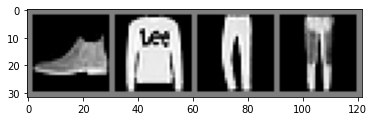

GroundTruth:  Ankle boot Pullover Trouser Trouser


In [9]:
dataiter = iter(testLoader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [10]:
correct = 0
total = 0
accuracy = []
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        accuracy.append(100 * correct // total)
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of the network on the 10000 test images: 79 %


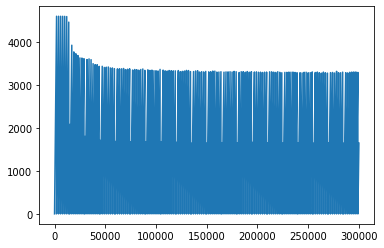

In [11]:
plt.plot(Loss,label = 'Loss')

plt.show()

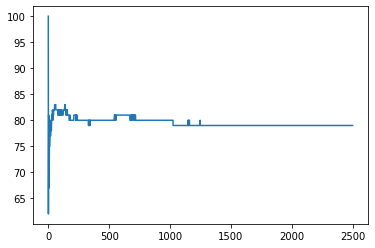

In [12]:
plt.plot(accuracy, label = 'Accuracy')
plt.show()

In [19]:
# load the model
model = net
print(model)
model_weights = [] # we will save the conv layer weights in this list
conv_layers = [] # we will save the 49 conv layers in this list
# get all the model children as list
model_children = list(model.children())

Net(
  (conv1): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 12, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
  (conv3): Conv2d(12, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
  (droput): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=32, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (fc3): Linear(in_features=60, out_features=10, bias=True)
)


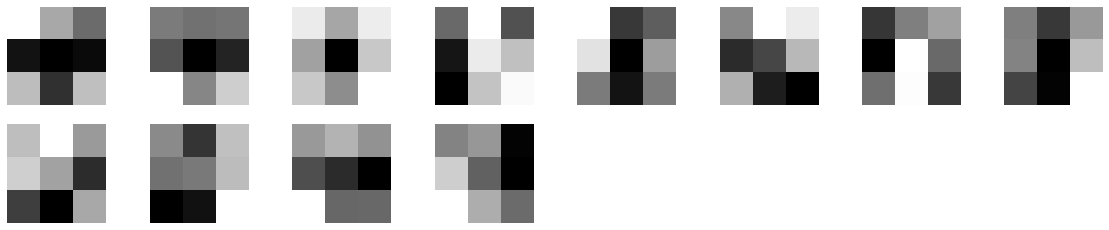

In [27]:
# visualize the first conv layer filters
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[0]):
    plt.subplot(8, 8, i+1) # (8, 8) because in conv0 we have 7x7 filters and total of 64 (see printed shapes)
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')
plt.show()

# A. Show the network diagram.
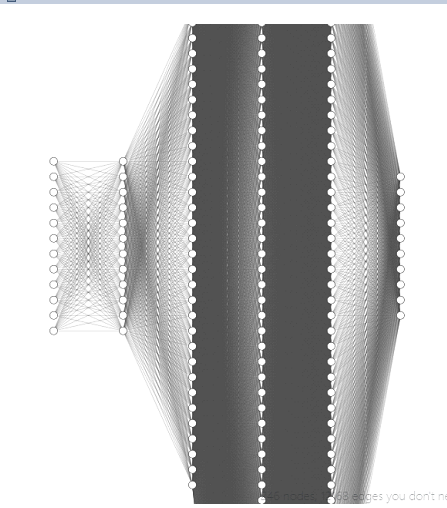

# B. Note the number of trainable parameters for this network.
Number of trainable parameters are: 31002 
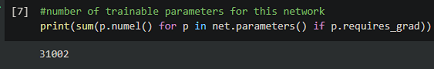

# C. Describe the accuracy you obtain and show the loss/ accuracy curves. 
Accuracy is 86%.
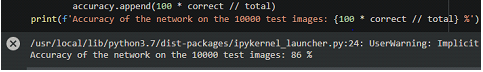


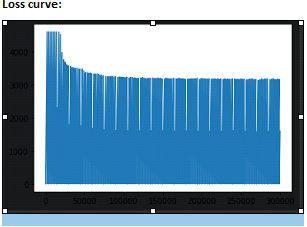

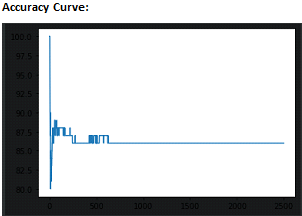

# D. Do you observe any overfitting? Apply Dropout with CNN to see the effect of regularization? Report your results.
No I don’t observe any overfitting because it gave accuracy on test data of about 86% and seems it hasn’t remembered the images and more over it can make decision on random and unseen data, after validating it over few inputs it gave almost 100% correct result.

Apply Dropout:

After applying the dropout with CNN it can be seen that the accuracy of the model is dropped from 86% to 79%, but the data which I used to check the accuracy, this model gave 100% correct results.
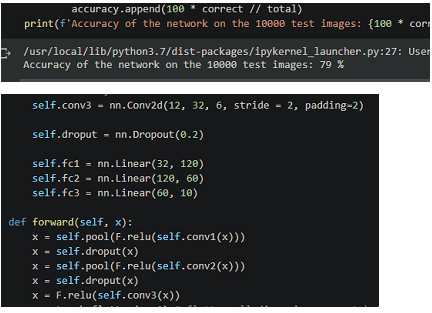


# E. Try to visualize the filter outputs of the first layer of your CNN model and reflect on your findings?
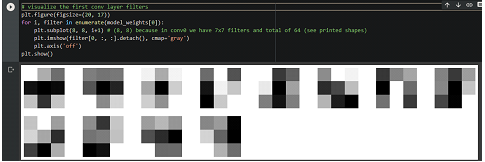
The first convolution layer converts all the pixels in its receptive field into a single value.